# Importing dataset and libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

random_seed = 33

In [4]:
#pegando o dataset do drive quando rodando no collab
#from google.colab import drive
#drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Mounted at /content/drive
/gdrive


In [6]:
columns_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope', 'class_att', 'observation'] 
df = pd.read_csv('/content/drive/MyDrive/SistemasInteligentes/MLP/Dataset_spine.csv')
df.columns = columns_names
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att,observation
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


# Análise Exploratória dos Dados

### Quantidade de cada classe

Com esse plot, pode-se notar que o conjunto de dados é desbalanceado

<Axes: xlabel='class_att'>

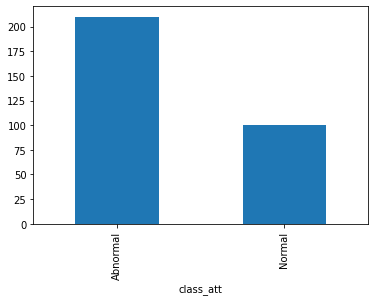

In [7]:
df.value_counts('class_att').plot(kind='bar')

### Tipos de dados de cada coluna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class_att                 310 non-null    object 
 13  observation               14 non-null     object 
dtypes: float64

### Busca por valores NaN ou Null

Desconsiderando a coluna de observação

In [9]:
df.isna().describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att,observation
count,310,310,310,310,310,310,310,310,310,310,310,310,310,310
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,310,310,310,310,310,310,310,310,310,310,310,310,310,296


In [10]:
df.isnull().describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att,observation
count,310,310,310,310,310,310,310,310,310,310,310,310,310,310
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,310,310,310,310,310,310,310,310,310,310,310,310,310,296


Com essa análise podemos notar que só existem valores Null/NaN para o campo "observation" que é um campo textual. Vamos então desconsiderar esse campo para facilitar a nossa análise

In [11]:
df = df.drop(columns=['observation'])
df.head(1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.2544,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal


### Comparação das estatísticas das features

Comparação de estatísticas das features para instâncias normais e anormais:

In [12]:
# Normais
df.query('class_att == "Normal"').describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483,0.284711,8.846484,3.142902,2.955985,12.675224,10.852099
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179,0.005045,7.390700,7.475200,7.054110,-35.077537,7.432400
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360,0.201843,13.164225,11.053625,8.706198,-26.789617,17.838050
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.414600,13.409750,11.330750,-13.974694,27.727950
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807,0.695981,29.760625,15.568925,13.816777,-4.488790,35.660300
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767,0.997247,36.619400,19.265900,16.617540,6.972071,44.341200


In [13]:
# Anormais
df.query('class_att == "Abnormal"').describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,64.692562,19.791111,55.925370,44.901450,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
std,17.662129,10.515871,19.669471,14.515560,14.090605,40.696741,0.286319,8.550365,3.516762,2.848401,12.029824,10.242513
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-10.675871,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,50.102507,13.048130,41.116964,34.380345,107.309280,7.263227,0.250212,13.054400,10.151175,9.801870,-23.732086,16.900900
50%,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.750600,12.770050,11.973735,-14.892070,24.509400
75%,77.593672,24.815515,68.102805,55.146868,123.133365,55.371614,0.708476,28.194975,15.950475,14.609660,-2.937705,33.204375
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.868423,44.233800


Só com essa análise podemos notar que a feature "degree_spondylolisthesis" tem uma distruibuição bastante distinta das instâncias normais para as anormais. Por exemplo, uma média de 2,18 para as instâncias normais vs 37,78 para as anormais.

Dito isso vamos comparar visualmente a distribuição dela para as duas classes do problema:

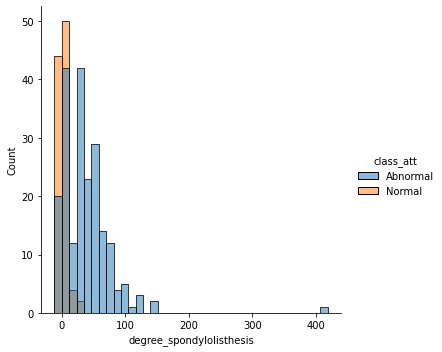

In [14]:
sns.displot(data=df, x='degree_spondylolisthesis', hue='class_att')

Conforme pode ser notado, existe uma diferença considerável na distribuição da feature para as duas classes, sugerindo que a mesma vai ter uma boa importância na classificação

### Histogramas das features

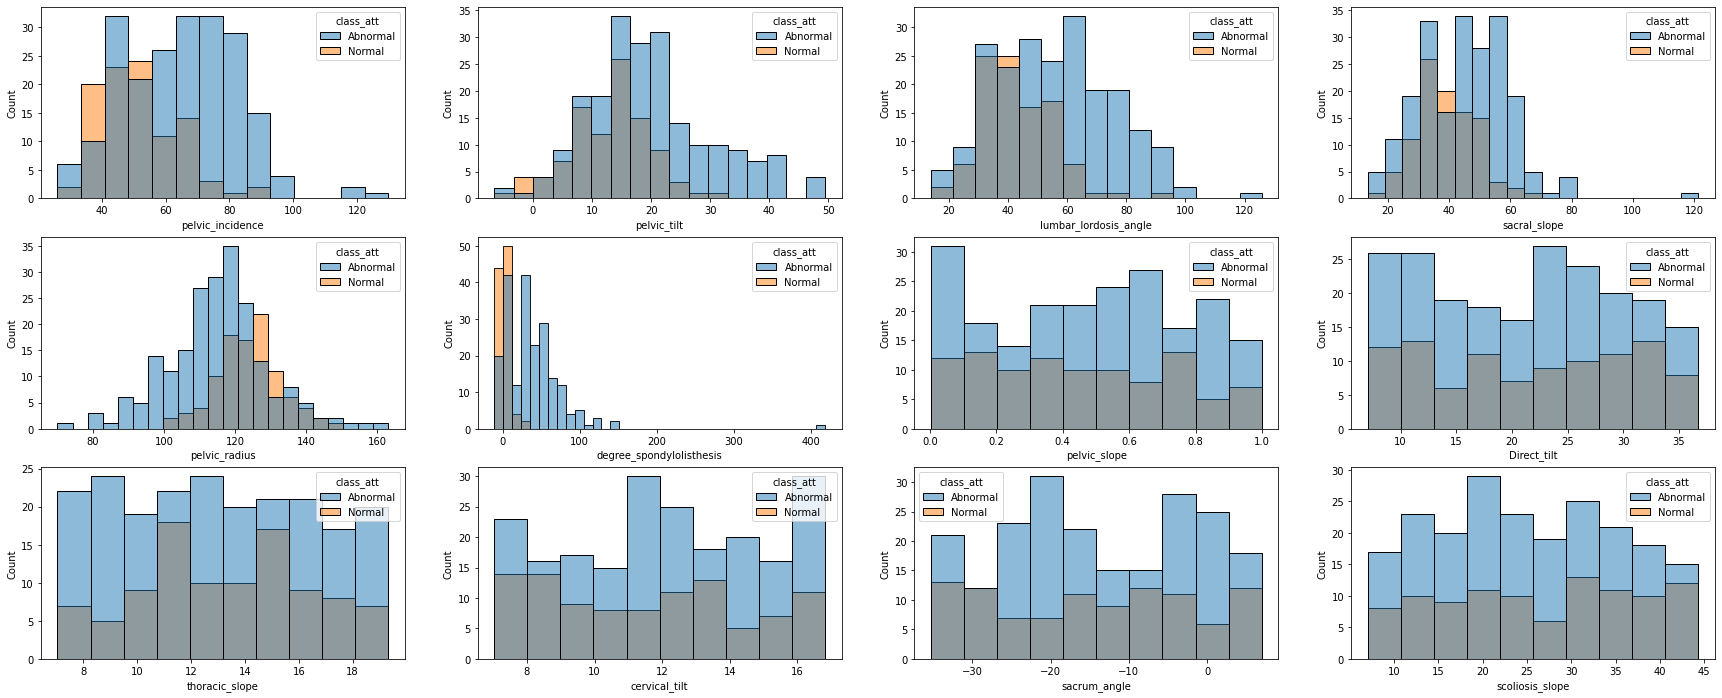

In [15]:
fig, axes = plt.subplots(3, 4)
fig.set_size_inches((30, 12))

cnt = 0
columns = df.columns
for row in range(3):
    for col in range(4):
        sns.histplot(data=df, x=columns[cnt], hue='class_att', ax=axes[row, col])
        cnt += 1

### Boxplot das features

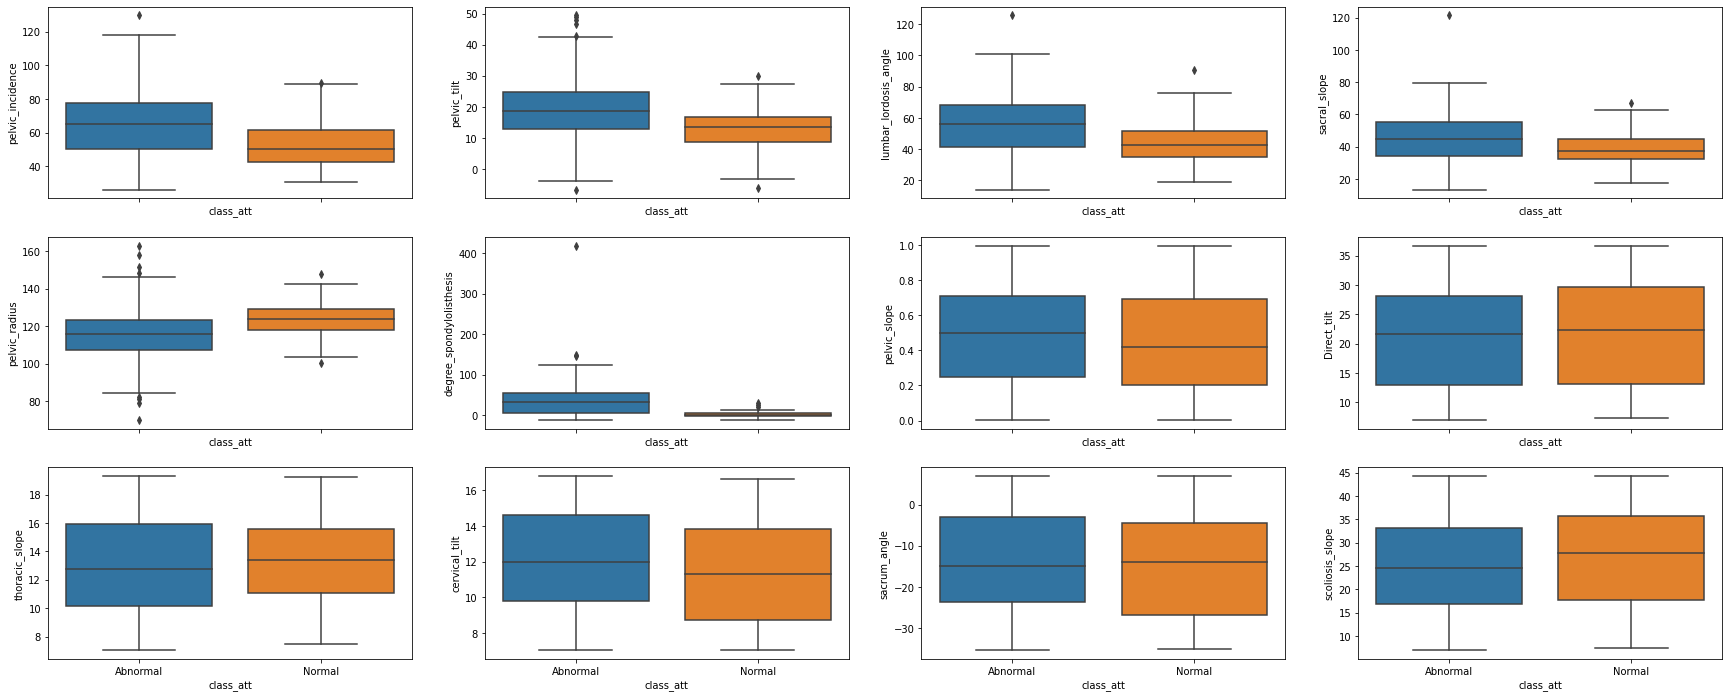

In [16]:
fig, axes = plt.subplots(3, 4, sharex=True)
fig.set_size_inches((30, 12))

cnt = 0
columns = df.columns
for row in range(3):
    for col in range(4):
        sns.boxplot(data=df, x='class_att', y=columns[cnt], ax=axes[row, col])
        cnt += 1

### Correlação entre features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'pelvic_incidence'),
  Text(1.5, 0, 'pelvic_tilt'),
  Text(2.5, 0, 'lumbar_lordosis_angle'),
  Text(3.5, 0, 'sacral_slope'),
  Text(4.5, 0, 'pelvic_radius'),
  Text(5.5, 0, 'degree_spondylolisthesis'),
  Text(6.5, 0, 'pelvic_slope'),
  Text(7.5, 0, 'Direct_tilt'),
  Text(8.5, 0, 'thoracic_slope'),
  Text(9.5, 0, 'cervical_tilt'),
  Text(10.5, 0, 'sacrum_angle'),
  Text(11.5, 0, 'scoliosis_slope')])

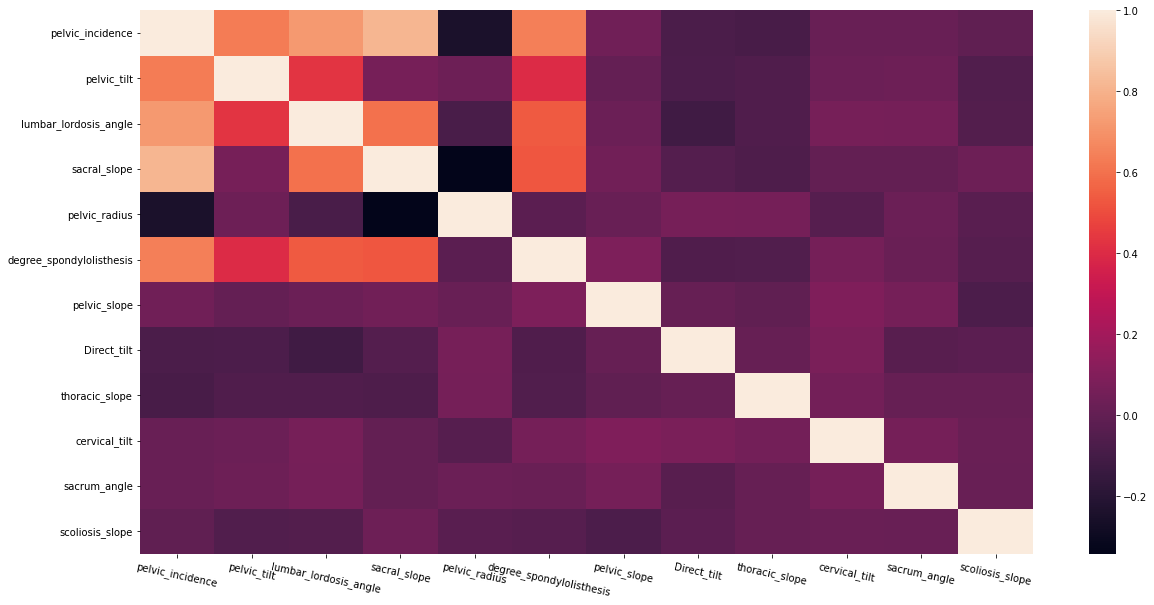

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.xticks(rotation=-12)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Plot pelvic_incidence x pelvic_radius'}, xlabel='pelvic_incidence', ylabel='sacral_slope'>

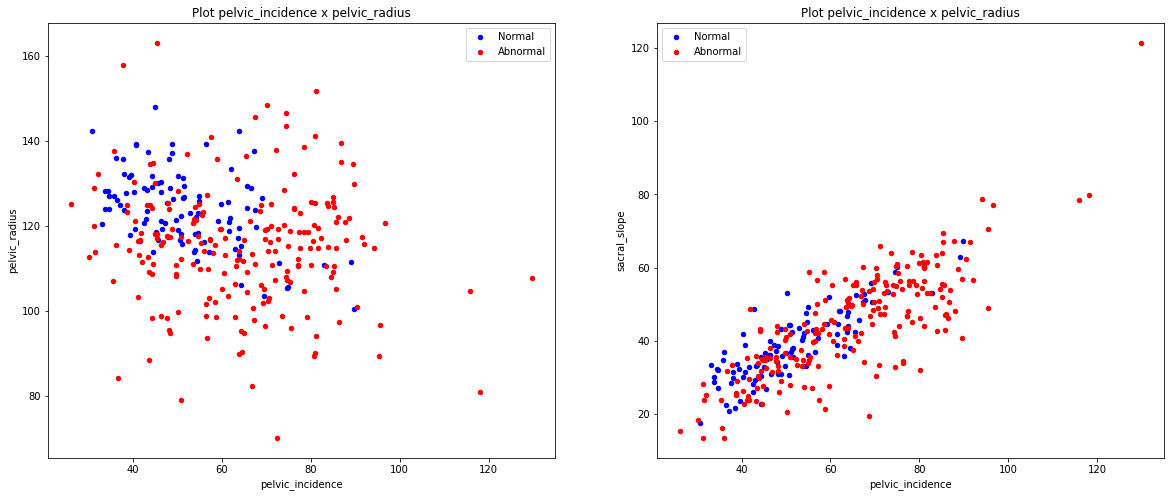

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((20, 8))

df.query('class_att == "Normal"').plot(x='pelvic_incidence', y='pelvic_radius', kind='scatter', title='Plot pelvic_incidence x pelvic_radius', ax=axes[0], color='b', label='Normal')
df.query('class_att == "Abnormal"').plot(x='pelvic_incidence', y='pelvic_radius', kind='scatter', title='Plot pelvic_incidence x pelvic_radius', ax=axes[0], color='r', label='Abnormal')

df.query('class_att == "Normal"').plot(x='pelvic_incidence', y='sacral_slope', kind='scatter', title='Plot pelvic_incidence x pelvic_radius',  ax=axes[1], color='b', label='Normal')
df.query('class_att == "Abnormal"').plot(x='pelvic_incidence', y='sacral_slope', kind='scatter', title='Plot pelvic_incidence x pelvic_radius',  ax=axes[1], color='r', label='Abnormal')

## Plots de redução de dimensionalidade

### PCA

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

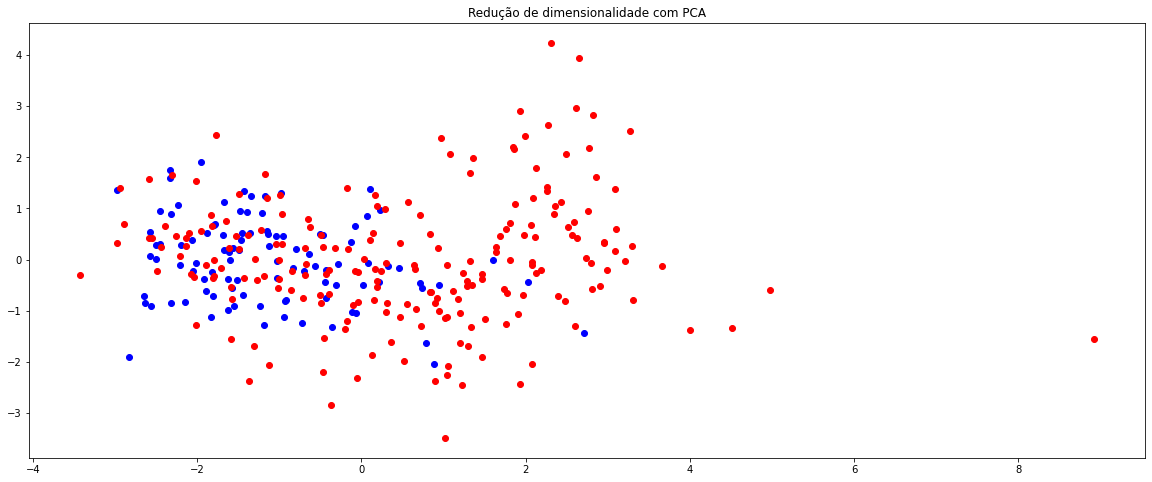

In [20]:
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(df.drop(columns=['class_att']))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scal)

pca_normal = principal_components[df.query('class_att == "Normal"').index]
pca_abnormal = principal_components[df.query('class_att == "Abnormal"').index]

plt.figure(figsize=(20, 8))
plt.title('Redução de dimensionalidade com PCA')
plt.plot(pca_normal[:, 0], pca_normal[:, 1], 'o', color='b')
plt.plot(pca_abnormal[:, 0], pca_abnormal[:, 1], 'o', color='r')


### t-SNE

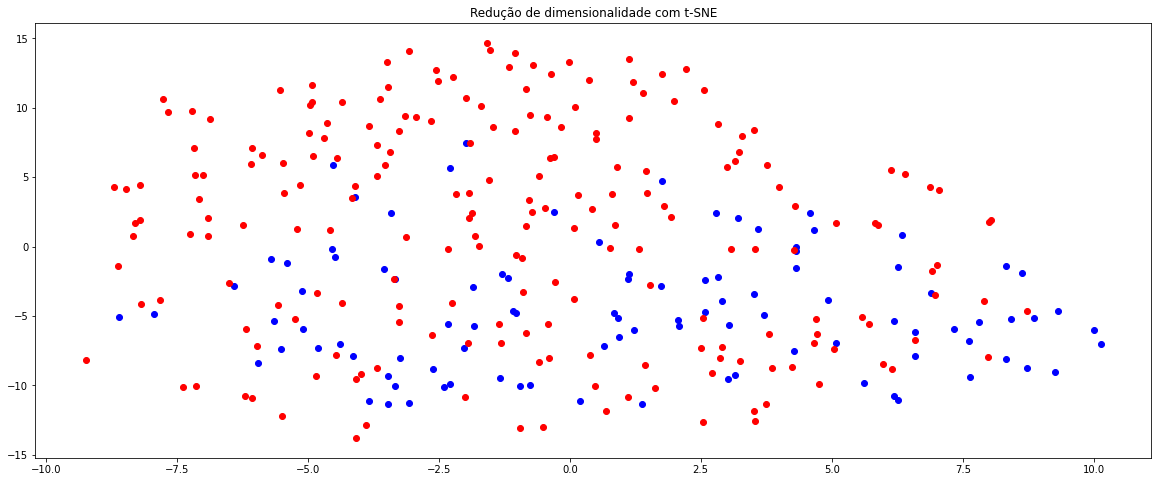

In [21]:
tsne = TSNE(random_state=random_seed, n_components=2, verbose=0, perplexity=40, n_iter=3800).fit_transform(X_scal)

tnse_normal = tsne[df.query('class_att == "Normal"').index]
tnse_abnormal = tsne[df.query('class_att == "Abnormal"').index]

plt.figure(figsize=(20, 8))
plt.title('Redução de dimensionalidade com t-SNE')
plt.plot(tnse_normal[:, 0], tnse_normal[:, 1], 'o', color='b')
plt.plot(tnse_abnormal[:, 0], tnse_abnormal[:, 1], 'o', color='r')

# Divisão de conjuntos de treino, validação e teste

Convertendo o campo respectivo a classe para dígitos binários

In [22]:
df['class_att'] = df['class_att'].apply(lambda c: 1 if c == 'Abnormal' else 0)

Divisão dos dados em conjuntos diferentes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class_att']), df['class_att'], test_size=0.3, random_state=random_seed)
len(X_train), len(y_train), len(X_test), len(y_test)

(217, 217, 93, 93)

# Modelagem

Uma baseline mínima seria uma acurácia de 210/310 = 67,74%, visto que é a fração da maior classe no dataset. Um modelo que tenha resultados piores do que isso não tem utilidade

## MLP

In [24]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5), activation='relu', random_state=random_seed, max_iter=200)

In [25]:
mlpc1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=33)

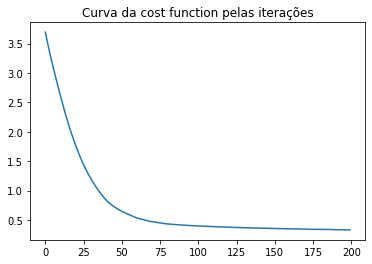

In [26]:
plt.title('Curva da cost function pelas iterações')
plt.plot(mlpc1.loss_curve_)

In [27]:
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

'Acurácia no treino: 0.815668202764977. Acurácia no teste: 0.7741935483870968'

Portanto, esse modelo simples modelo resultou em uma acurácia de aproximadamente 77,41% no conjunto de teste 

##Tuning do modelo

Agora vamos tentar melhorar o resultado!

---


Primeiro vou testar outras funcões de ativação, mantendo-se os mesmos parâmetros

In [33]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5), activation='tanh', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.8018433179723502. Acurácia no teste: 0.7526881720430108'

In [34]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5), activation='logistic', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.7004608294930875. Acurácia no teste: 0.6236559139784946'

Percebe-se que o melhor resultado ,com essas configurações, é a função ReLU


---

Agora é hora de tentar outras configurações da rede de perceptrons

Três layers com 5 perceptrons em cada

In [38]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.8341013824884793. Acurácia no teste: 0.7634408602150538'

Quatro layers

In [36]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.8341013824884793. Acurácia no teste: 0.7849462365591398'

Cinco layers

In [40]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.3271889400921659. Acurácia no teste: 0.3978494623655914'

Seis layers

In [41]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.3271889400921659. Acurácia no teste: 0.3978494623655914'

O número ideal parece estar entre 3 e 4 layers, vou tentar mudar os tamanhos com quatro layers

In [39]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.8064516129032258. Acurácia no teste: 0.7956989247311828'

In [42]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

'Acurácia no treino: 0.8018433179723502. Acurácia no teste: 0.7204301075268817'

In [43]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(124, 64, 20, 10), activation='relu', random_state=random_seed, max_iter=200)
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

'Acurácia no treino: 0.8018433179723502. Acurácia no teste: 0.8172043010752689'

Como os resultados são semelhantes, vou usar uma automatização pra achar a melhor configuração, da dimensão da rede (com sempre 4 hidden layers), do learning rate, do alpha(que tuna a regularização L2) e do solver também!

In [47]:
parameter_space = {
    'hidden_layer_sizes': [(16,8, 4,2), (64,32, 16, 8), (124, 64, 20, 10), (200, 100, 20, 8), (2, 2, 2, 2), (3, 4, 6, 8), (12, 12, 12, 12)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.005, 0.05, 0.0001, 0.01],
    'learning_rate': ['constant','adaptive','invscaling'],
}

In [48]:
mlp = MLPClassifier(max_iter=200)

In [49]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/initializers.py:26: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected: '/gdrive'
  warnings.warn("Unable to introspect viztracer state: {}"


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.005, 0.05, 0.0001, 0.01],
                         'hidden_layer_sizes': [(16, 8, 4, 2), (64, 32, 16, 8),
                                                (124, 64, 20, 10),
                                                (200, 100, 20, 8), (2, 2, 2, 2),
                                                (3, 4, 6, 8),
                                                (12, 12, 12, 12)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']})

In [50]:
print('Melores parâmetros:\n', clf.best_params_)

Melores parâmetros:
 {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (200, 100, 20, 8), 'learning_rate': 'constant', 'solver': 'sgd'}


Vamos testar agora os melhores resultado achados no test-set

In [53]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(200, 100, 20, 8), activation='relu', random_state=random_seed, max_iter=200, alpha=0.005, learning_rate='constant', solver='sgd')
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

'Acurácia no treino: 0.8387096774193549. Acurácia no teste: 0.8494623655913979'

Só por curiosidade, vou utilizar os mesmos parâmetros mas deixa apenas uma hidden layer para ver como o resultado compara!

In [57]:
mlpc1 = MLPClassifier(hidden_layer_sizes=(12), activation='relu', random_state=random_seed, max_iter=200, alpha=0.005, learning_rate='constant', solver='sgd')
mlpc1.fit(X_train, y_train)
f"Acurácia no treino: {mlpc1.score(X_train, y_train)}. Acurácia no teste: {mlpc1.score(X_test, y_test)}"

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Acurácia no treino: 0.8387096774193549. Acurácia no teste: 0.8602150537634409'

Surpreendentemente os resultados melhoram com uma layer somente, como eu li recentemente que uma hidden layer geralmente resolve o seu problema e, que a quantidade de perceptrons adequada é geralmente entre o tamanho da layer de entrada e da layer de saída (12 e 1 nesse caso) , quis testar isso.

Aqui a referência : https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw